# KNN (K Nearerst Neighbor)

### WHAT IS KNN?
KNN is a rather simple algorithm that is typically used as a classifier (which is the use we'll focus on here) but it may also be utilized in regression type problems. 

KNN is a *lazy*, *instance* based learner that takes some observation and tries to assign it a category based upon its proximity to "k" (number of observations) neighboring data points. Essentially the algorithm looks at a data points 'K' nearest neighbors and and then assigns the classification of the the majority class near that data point.

Lets go ahead an visualize this so we can start to get a more intuitive understanding of the mechanisms at play here.

Data used in this example: [Iris Data](https://archive.ics.uci.edu/ml/datasets/iris)

In [1]:
# import our libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Now that we have our libraries we can pull down a basic data set to experiment with

#Iris dataset, a typical toy data set
#Reading the data into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Jaunson/Scripts/master/iris.csv')

#Column names for data to be inserted
col_names = ['Sepal Length - cm', 'Sepal Width - cm', 'Petal Length - cm', 'Petal Width - cm', 'Class']
#Mystery Data Points adding these for our KNN demo
mysterydata1 = pd.DataFrame(data=[[7,2.8,3.75,1.2,'?']],columns=col_names) 
mysterydata2 = pd.DataFrame(data=[[4.75,3.25,3.75,1.2,'?']],columns=col_names)

#Appending our points onto the data set (similar to a SQL UNION)
df = df.append([mysterydata1,mysterydata2])

df.info() #pull down basic metadata to make sure things look ok
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 0
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         150 non-null    float64
 1   Sepal Length - cm  152 non-null    float64
 2   Sepal Width - cm   152 non-null    float64
 3   Petal Length - cm  152 non-null    float64
 4   Petal Width - cm   152 non-null    float64
 5   Class              152 non-null    object 
dtypes: float64(5), object(1)
memory usage: 8.3+ KB


,Unnamed: 0,Sepal Length - cm,Sepal Width - cm,Petal Length - cm,Petal Width - cm
count,150.000000,152.000000,152.000000,152.000000,152.000000
mean,74.500000,5.843750,3.053618,3.758553,1.198684
std,43.445368,0.832699,0.431504,1.752697,0.758090
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.300000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


### VISUALIZING KNN

Ok now that we have gone a head and imported our libraries and pull our data in, lets start to get a sense of how KNN works by visualizing our data points on a scatter plot. We'll start out by taking two dimensions (Sepal Length & Sepal Width) and visualizes where each of our observations fall on the scatter, we'll also color the observations by their name (Class).

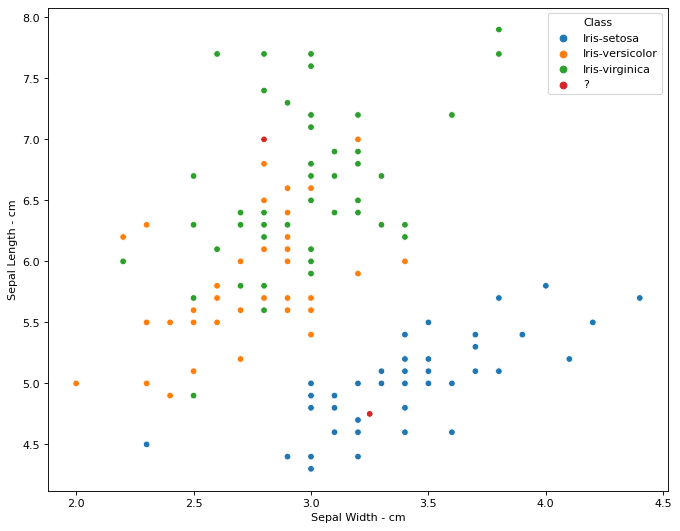

In [15]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
original=sns.scatterplot(x=df['Sepal Width - cm'],y=df['Sepal Length - cm'],hue=df['Class'])

Great so we can see that we have 3 distinct classes on our scatterplot with ~152 observations, and 2 of our data points are unclassified.

### HOW IS KNN GOING TO HELP US IDENTIFY THESE MYSTERY VALUES?

![Simply Watson](https://i.imgflip.com/2xur2n.jpg)

- How do we decide who is  a neighbor?

We first determine a k-value

- We want an odd number, this will keep us from having ties between categories
- Low values (1's & 2's) can skew the selection made for a given observation
- Not sure where to start? - try making 'k' = $\sqrt{n}$, n = number of observations
    
The KNN algorithm will then calculates the euclidean distance between observations and find the 'k' neighbors closest.

The majority class within 'k' neighboring points will then be used to classify our unknown observation.

[Overview of KNN - By StatQuest!](https://youtu.be/HVXime0nQeI)
        

In [61]:
import sklearn

# preprocess our data to work with the model

# split our mystery points from our data
known = df.query("Class!='?'").reset_index(drop=True)
mystery = df.query("Class=='?'").reset_index(drop=True)

# Split each set into its features and target (for our simple example remember we are only using the Sepal features)
# Sklearn works with Numpy arrays so we'll also do a quick conversion

known_features = known.iloc[:,0:2].values # .values leaves us with each vector as a np array 
known_target = known.iloc[:,4].values

mystery_features = mystery.iloc[:,0:2].values
mystery_target = mystery.iloc[:,4].values

k = 3 # our k value, after running through exercise adjust this value to see what changes

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)

# Fit our model
knn.fit(known_features, known_target) # < build our model with known information
prediction=pd.Series(knn.predict(mystery_features)) # < use model to predict mystery information
prediction

0    Iris-virginica
1       Iris-setosa
dtype: object

# NOW VISUALIZE

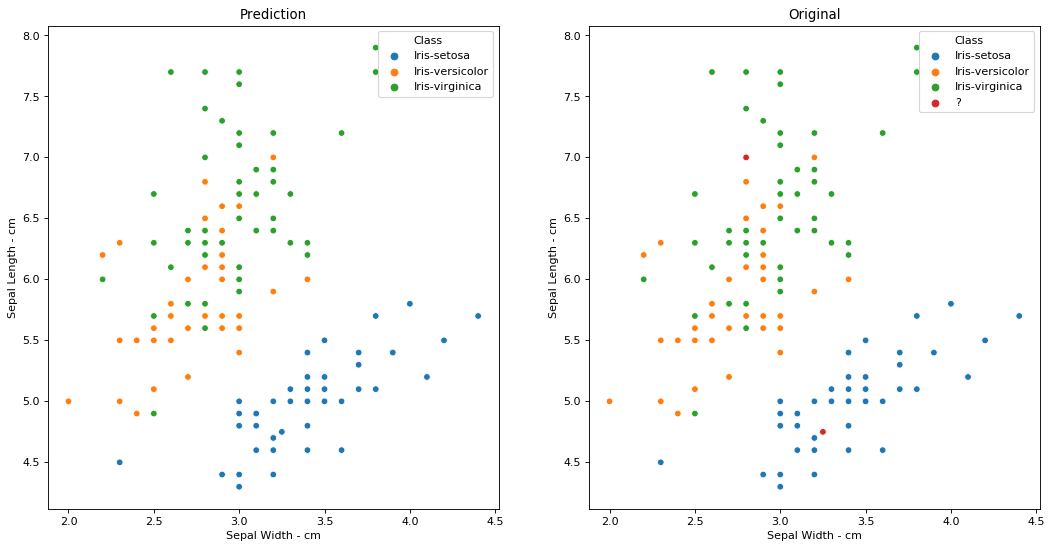

In [122]:
mystery['Class'] = prediction
pred_df = known.append(mystery).reset_index(drop=True)
pred_df

fig, ax = plt.subplots(1,2, figsize=(16,8), dpi= 80, facecolor='w', edgecolor='k')

ax[0].set_title('Prediction')
ax[1].set_title('Original')

sns.scatterplot(x=pred_df['Sepal Width - cm'],y=pred_df['Sepal Length - cm']
                ,hue=pred_df['Class'],ax=ax[0])

sns.scatterplot(x=df['Sepal Width - cm'],y=df['Sepal Length - cm']
                ,hue=df['Class'],ax=ax[1])


Now in this example there appears to be a clear speration along the two dimensions we have chosen betwen Sentosa and the other two varieties - so we can be pretty confident in that prediction. 

Adjusting K up and down would likely cause the classification of the upper right mystery variable to shift however since there is less of a clear boundary between Veriscolor and Virginica along these dimensions.

Play around with this data set and create some of your own mystery observations to see how clustering of observations affects the output of KNN!



# Caveats 

So the purpose behind this little demo is to help folks get a more intuitive understanding of what is happening ***'behind the scenes'*** with KNN. That being said my example doesn't follow all of the best practices and preprocessing that one might do if you were going to truely utilize KNN or other algorithm for some classification problem.

I will be covering these topics indepth in future tutorials:

- Data Preprocessing (Standardization & Normalization)
- Test/Train sets
- Cross Validation
- ML Workflow

***HIGH VALUE CAT MEME - THANKS FOR CHECKING OUT MY TUTORIAL***
![Problems](https://i1.wp.com/www.cutesypooh.com/wp-content/uploads/2018/11/PRINGUS-6-15.jpg?resize=565%2C650&ssl=1)